# Final Project - Identifying Particles From Detector Measurements

In this analysis, we have a dataset of labeled particles from a detector (WHAT KIND?) with 6 different attributes. My goal is to build several classification algorithms for this data using different methods we've covered in PHYS 8100 this semester and perform a cross examination of them regarding their efficiency and performance.

https://www.kaggle.com/naharrison/particle-identification-from-detector-responses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Algorithm 1 - Decision Trees

In [2]:
from sklearn import tree

We need X to be a numpy array of the 6 attributes for each point
We need y to be a list of classifiers

In [56]:
# import data and shape in to the right type of inputs
PATH = 'archive/pid-5M.csv'

# use maxrows as 1000 for now just to have things run quickly - TRUE SIZE IS 5000000
raw_data = np.loadtxt(PATH, delimiter=',', skiprows=1, max_rows=1000000)

new_labels = {
    211: 0,
    2212: 1,
    321: 2,
    -11: 3
}

# clean data by replacing with 0-3 instead of arbitrary particle id
for row in raw_data:
    row[0] = new_labels[row[0]]
    
print(raw_data[0])

[0.       0.780041 1.08148  0.989962 0.       0.       0.      ]


In [57]:
print(raw_data.shape)

# break into training and testing data
X = raw_data[:800, 1:]
y = raw_data[:800, 0]

X_test = raw_data[800:, 1:]
y_test = raw_data[800:, 0]

(1000000, 7)


#### Entropy Model

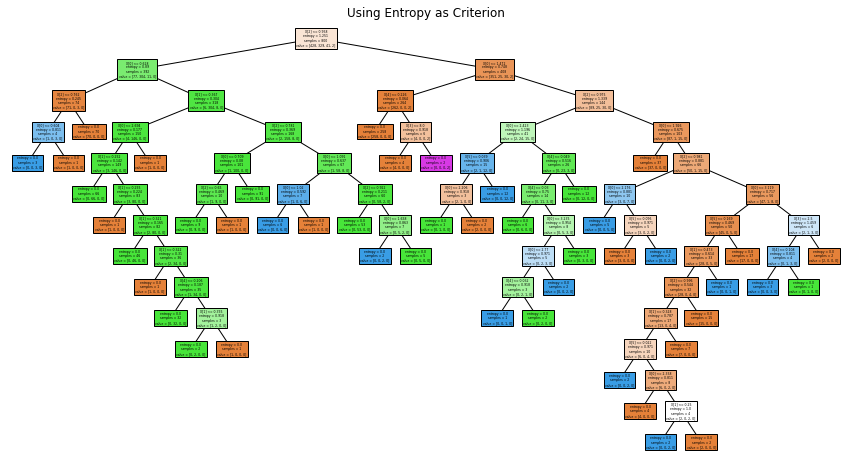

In [5]:
entropy_start_time = time.time()

model = tree.DecisionTreeClassifier(criterion = 'entropy')
model_fit = model.fit(X, y)

fig , ax1 = plt.subplots(figsize = [15,8])

tree.plot_tree(model_fit,filled = True , ax=ax1)
plt.title("Using Entropy as Criterion")
plt.show()

In [6]:
# test entropy model
results = model.predict(X_test)

correct = 0
for i in range(len(results)):
    if results[i] == y_test[i]:
        correct += 1
    
accuracy = correct / len(results)
print('Entropy Model Accuracy:', accuracy)

entropy_end_time = time.time()
print('Time Elapsed:', entropy_end_time-entropy_start_time)

Entropy Model Accuracy: 0.9341713370696557
Time Elapsed: 4.024752616882324


#### Gini Model

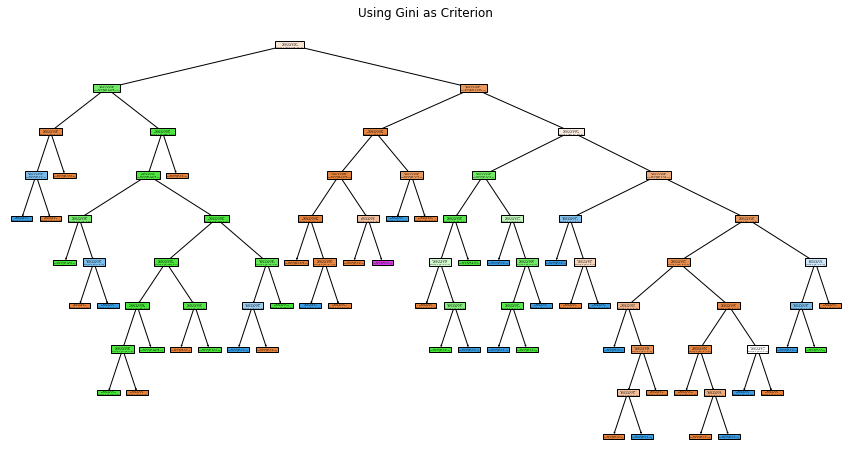

In [7]:
gini_start_time = time.time()

model = tree.DecisionTreeClassifier(criterion = 'gini')
model_fit = model.fit(X, y)

fig , ax1 = plt.subplots(figsize = [15,8])

tree.plot_tree(model_fit,filled = True , ax=ax1)
plt.title("Using Gini as Criterion")
plt.show()

In [8]:
# test gini model
results = model.predict(X_test)

correct = 0
for i in range(len(results)):
    if results[i] == y_test[i]:
        correct += 1
    
accuracy = correct / len(results)
print('Gini Model Accuracy:', accuracy)

gini_end_time = time.time()
print('Time Elapsed:', gini_end_time-gini_start_time)

Gini Model Accuracy: 0.9401230984787831
Time Elapsed: 3.38995099067688


### Algorithm 2 - Dimension Reduction and Clustering

In [ ]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Clustering Algorithm 1 - KMEANS

In [ ]:
kmeans_start_time = time.time()

# we know the number of clusters is 4
kmeans_model = KMeans(n_clusters=4).fit(X)

predicts = kmeans_model.predict(X_test)
print(predicts)

correct = 0
for i in range(len(predicts)):
    if predicts[i] == y_test[i]:
        correct += 1
        
accuracy = correct / len(predicts)
print('KMEANS accuracy:', accuracy)

kmeans_end_time = time.time()
print('Time Elapsed:', kmeans_end_time-kmeans_start_time)

#### Clustering Algorithm 2 - Gaussian Mixture

In [ ]:
gmm_start_time = time.time()

gmm_model = GaussianMixture(n_components=4).fit(X)

gmm_predicts = gmm_model.predict(X_test)
print(gmm_predicts)

correct = 0
for i in range(len(gmm_predicts)):
    if predicts[i] == y_test[i]:
        correct += 1
        
accuracy = correct / len(gmm_predicts)
print('Gaussian Mixture accuracy:', accuracy)

gmm_end_time = time.time()
print('Time Elapsed:', gmm_end_time-gmm_start_time)

#### Dimensionality Reduction and Clustering Hybrid

In [ ]:
pca_fit = PCA(n_components = 2).fit_transform(X)

axis_1 = pca_fit[:, 0]
axis_2 = pca_fit[:, 1]

sns.scatterplot(x=axis_1, y=axis_2)
plt.show()

In [ ]:
# visualization with TSNE
tsne_fit = TSNE(n_components=2).fit_transform(X)

axis_1 = tsne_fit[:, 0]
axis_2 = tsne_fit[:, 1]

sns.scatterplot(x=axis_1, y=axis_2)
plt.show()

In [ ]:
# clustering hybrid with tsne
# hybrid 1 - KMEANS
tsne_start_time = time.time()

tsne_fit = TSNE(n_components=2).fit_transform(X)
kmeans_model = KMeans(n_clusters=4).fit(tsne_fit)

# tsne on X_test
tsne_test = TSNE(n_components=2).fit_transform(X_test)
predicts = kmeans_model.predict(tsne_test)

print(y_test)
print(predicts)

correct = 0
for i in range(len(predicts)):
    if predicts[i] == y_test[i]:
        correct += 1
        
accuracy = correct / len(predicts)
print('KMEANS Hybrid accuracy:', accuracy)

tsne_end_time = time.time()
print('Time Elapsed:', tsne_end_time-tsne_start_time)

In [ ]:
# hybrid 2- GMM
gmm_start_time = time.time()

tsne_fit = TSNE(n_components=2).fit_transform(X)
gmm_model = GaussianMixture(n_components=4).fit(tsne_fit)

# tsne on X_test
tsne_test = TSNE(n_components=2).fit_transform(X_test)
predicts = gmm_model.predict(tsne_test)

print(y_test)
print(predicts)

correct = 0
for i in range(len(predicts)):
    if predicts[i] == y_test[i]:
        correct += 1
        
accuracy = correct / len(predicts)
print('GMM Hybrid accuracy:', accuracy)

gmm_end_time = time.time()
print('Time Elapsed:', gmm_end_time-gmm_start_time)

### Algorithm 3 - Feedforward Neural Network

In [66]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

#### Type 1 - Logistic Regression

In [67]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # This is the forward pass in the function evaluation
        outputs = self.layer(x)
        return outputs

In [68]:
def fit_model(model, optimizer, loss, training_loader, testing_loader, epochs):
    iterations_test = []
    accuracies_test = []
    accuracies_train = []

    iter = 0
    for epoch in range(int(epochs)):
        for i, (features, classifications) in enumerate(training_loader):
            optimizer.zero_grad() 
            forward_iter = model(features)     
            
            loss_iter = loss(forward_iter, classifications)
            loss_iter.backward()

            optimizer.step()

            iter += 1
            # Every so often, calculate training and test errors.
            # test error calculation
            if iter % 100 == 0:
                # calculate Accuracy
                correct = 0
                total = 0
                for features, classifications in testing_loader:
                    outputs = model(features)
                    _, predicted = torch.max(outputs.data, 1)
                    total+= classifications.size(0)
                    correct+= (predicted == classifications).sum()
                accuracy = 100 * correct/total
                    
                # keep track of accuracy vs iteration for plotting
                iterations_test.append(iter)
                accuracies_test.append(accuracy)

                print("Iteration: {}. Test Data Accuracy: {}".format(iter, accuracy))                
    return iterations_test, accuracies_train, accuracies_test

In [69]:
# define dataset class
class Particle_Dataset(Dataset):
    def __init__(self, data, labels):
        self.x_data = data
        self.y_data = labels
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        features = self.x_data[idx, 0:6]
        predictions = self.y_data[idx]
        
        return features, predictions

In [70]:
training_data = torch.tensor(X)
training_labels = torch.LongTensor(y)

testing_data = torch.tensor(X_test)
testing_labels = torch.LongTensor(y_test)

particle_dataset_train = Particle_Dataset(training_data, training_labels)
particle_dataset_test = Particle_Dataset(testing_data, testing_labels)

batch_size = 10
training_loader = DataLoader(particle_dataset_train, batch_size=batch_size, shuffle=True)
testing_loader = DataLoader(particle_dataset_test, batch_size=batch_size, shuffle=True)

In [71]:
lr_rate = 0.005
epochs = 30

model = LogisticRegression(6, 4)
model = model.double()

optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)
loss = nn.CrossEntropyLoss()

logistic_regression_start = time.time()
iterations_test, accuracies_train, accuracies_test = fit_model(model, optimizer, loss, training_loader, testing_loader, epochs)
logistic_regression_end = time.time()

print('Time Elapsed:', logistic_regression_end-logistic_regression_start)

Iteration: 100. Test Data Accuracy: 42.88460922241211
Iteration: 200. Test Data Accuracy: 68.24039459228516
Iteration: 300. Test Data Accuracy: 66.23078155517578
Iteration: 400. Test Data Accuracy: 62.03582763671875
Iteration: 500. Test Data Accuracy: 62.02471923828125
Iteration: 600. Test Data Accuracy: 61.242794036865234
Iteration: 700. Test Data Accuracy: 59.73178482055664
Iteration: 800. Test Data Accuracy: 59.928043365478516
Iteration: 900. Test Data Accuracy: 59.54313278198242
Iteration: 1000. Test Data Accuracy: 58.06195068359375
Iteration: 1100. Test Data Accuracy: 59.182044982910156
Iteration: 1200. Test Data Accuracy: 60.356285095214844
Iteration: 1300. Test Data Accuracy: 60.29964065551758
Iteration: 1400. Test Data Accuracy: 59.17033767700195
Iteration: 1500. Test Data Accuracy: 61.32365798950195
Iteration: 1600. Test Data Accuracy: 58.8250617980957
Iteration: 1700. Test Data Accuracy: 59.95536422729492
Iteration: 1800. Test Data Accuracy: 60.90142059326172
Iteration: 1900.

#### Type 2 - Deep Neural Network

In [72]:
class Deep_Network(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        # define layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, output_dim))
        
    def forward(self, x):
        return self.network(x)

In [74]:
lr_rate = 0.004
epochs = 30

model = Deep_Network(6, 4)
model = model.double()

optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)
loss = nn.CrossEntropyLoss()

deep_network_start = time.time()
iterations_test, accuracies_train, accuracies_test = fit_model(model, optimizer, loss, training_loader, testing_loader, epochs)
deep_network_end = time.time()

print('Time Elapsed:', deep_network_end-deep_network_start)

Iteration: 100. Test Data Accuracy: 56.20326232910156
Iteration: 200. Test Data Accuracy: 56.43764877319336
Iteration: 300. Test Data Accuracy: 65.67774200439453
Iteration: 400. Test Data Accuracy: 66.61279296875
Iteration: 500. Test Data Accuracy: 71.47357940673828
Iteration: 600. Test Data Accuracy: 74.72587585449219
Iteration: 700. Test Data Accuracy: 80.25960540771484
Iteration: 800. Test Data Accuracy: 88.61168670654297
Iteration: 900. Test Data Accuracy: 84.79403686523438
Iteration: 1000. Test Data Accuracy: 89.55413818359375
Iteration: 1100. Test Data Accuracy: 90.48188781738281
Iteration: 1200. Test Data Accuracy: 91.37580108642578
Iteration: 1300. Test Data Accuracy: 89.34447479248047
Iteration: 1400. Test Data Accuracy: 90.8526840209961
Iteration: 1500. Test Data Accuracy: 90.31525421142578
Iteration: 1600. Test Data Accuracy: 92.64811706542969
Iteration: 1700. Test Data Accuracy: 92.57716369628906
Iteration: 1800. Test Data Accuracy: 86.30393981933594
Iteration: 1900. Test D